In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Load the hr non linear train dataset
df_hr_train = pd.read_csv('Train Data/heart_rate_non_linear_features_train.csv')
# Load the time domain dataset
df_time_train = pd.read_csv('Train Data/time_domain_features_train.csv')

In [86]:
# Merge the two datasets on 'uuid'
df_train = pd.merge(df_hr_train, df_time_train, on='uuid')

In [87]:
# Look at the first few rows of the merged dataset
print(df_train.head())

                                   uuid        SD1         SD2    sampen  \
0  89df2855-56eb-4706-a23b-b39363dd605a  11.001565  199.061782  2.139754   
1  80c795e4-aa56-4cc0-939c-19634b89cbb2   9.170129  114.634458  2.174499   
2  c2d5d102-967c-487d-88f2-8b005a449f3e  11.533417  118.939253  2.135350   
3  37eabc44-1349-4040-8896-0d113ad4811f  11.119476  127.318597  2.178341   
4  aa777a6a-7aa3-4f6e-aced-70f8691dd2b7  13.590641   87.718281  2.221121   

     higuci  datasetId     condition     MEAN_RR   MEDIAN_RR        SDRR  ...  \
0  1.163485          2     no stress  885.157845  853.763730  140.972741  ...   
1  1.084711          2  interruption  939.425371  948.357865   81.317742  ...   
2  1.176315          2  interruption  898.186047  907.006860   84.497236  ...   
3  1.179688          2     no stress  881.757865  893.460030   90.370537  ...   
4  1.249612          2     no stress  809.625331  811.184865   62.766242  ...   

       KURT      SKEW  MEAN_REL_RR  MEDIAN_REL_RR  SDRR_

In [88]:
# Drop all the columns instead of "MEAN_RR", "SDRR", "RMSSD", "HR", "uuid", "SDRR_RMSSD"
df_train = df_train[["uuid", "HR", "MEAN_RR", "SDRR", "RMSSD", "SDRR_RMSSD", "condition"]]

In [89]:
# Look at the first few rows of the merged dataset
print(df_train.head())

                                   uuid         HR     MEAN_RR        SDRR  \
0  89df2855-56eb-4706-a23b-b39363dd605a  69.499952  885.157845  140.972741   
1  80c795e4-aa56-4cc0-939c-19634b89cbb2  64.363150  939.425371   81.317742   
2  c2d5d102-967c-487d-88f2-8b005a449f3e  67.450066  898.186047   84.497236   
3  37eabc44-1349-4040-8896-0d113ad4811f  68.809562  881.757865   90.370537   
4  aa777a6a-7aa3-4f6e-aced-70f8691dd2b7  74.565728  809.625331   62.766242   

       RMSSD  SDRR_RMSSD     condition  
0  15.554505    9.063146     no stress  
1  12.964439    6.272369  interruption  
2  16.305279    5.182201  interruption  
3  15.720468    5.748591     no stress  
4  19.213819    3.266724     no stress  


In [90]:
# Load the test dataset
df_hr_test = pd.read_csv('Test Data/heart_rate_non_linear_features_test.csv')
# Load the time domain test dataset
df_time_test = pd.read_csv('Test Data/time_domain_features_test.csv')

In [91]:
# Merge the two datasets on 'uuid'
df_test = pd.merge(df_hr_test, df_time_test, on='uuid')

In [92]:
# Look at the first few rows of the merged dataset
print(df_test.head())

                                   uuid        SD1         SD2    sampen  \
0  62b75db5-bc40-4c8f-9166-daf0efcab4c2   8.347898  115.862444  2.209659   
1  a99549ad-3eb6-4413-bc90-9053e7f7e684  14.542096   77.118903  2.186132   
2  cb573d3a-c767-4556-b32e-ad8c08ded214   9.799336  125.044377  2.051571   
3  47a0c6de-2aef-4ac3-997d-252fa6fd07f1  11.639185  302.029812  2.080910   
4  de3fd54f-c74e-4fe8-bf2a-7a127f68b312   7.266567   72.579248  2.068728   

     higuci  datasetId      condition      MEAN_RR  MEDIAN_RR        SDRR  \
0  1.100715          2  time pressure   934.665288  939.03173   82.139495   
1  1.290615          2      no stress   817.062380  816.33879   55.492332   
2  1.226663          2      no stress   876.762022  894.19889   88.690820   
3  1.085143          2  time pressure  1038.640693  998.91429  213.725850   
4  1.252547          2   interruption   774.548508  778.90508   51.577855   

   ...      KURT      SKEW  MEAN_REL_RR  MEDIAN_REL_RR  SDRR_REL_RR  \
0  ... -0

In [93]:
# Drop all the columns instead of "MEAN_RR", "SDRR", "RMSSD", "uuid", "SDRR_RMSSD"
df_test = df_test[["uuid", "MEAN_RR", "SDRR", "RMSSD", "SDRR_RMSSD", "condition"]]

In [94]:
# Look at the first few rows of the merged dataset
print(df_test.head())

                                   uuid      MEAN_RR        SDRR      RMSSD  \
0  62b75db5-bc40-4c8f-9166-daf0efcab4c2   934.665288   82.139495  11.801781   
1  a99549ad-3eb6-4413-bc90-9053e7f7e684   817.062380   55.492332  20.558810   
2  cb573d3a-c767-4556-b32e-ad8c08ded214   876.762022   88.690820  13.853737   
3  47a0c6de-2aef-4ac3-997d-252fa6fd07f1  1038.640693  213.725850  16.457194   
4  de3fd54f-c74e-4fe8-bf2a-7a127f68b312   774.548508   51.577855  10.273114   

   SDRR_RMSSD      condition  
0    6.959924  time pressure  
1    2.699200      no stress  
2    6.401942      no stress  
3   12.986774  time pressure  
4    5.020664   interruption  


In [95]:
# Create HR column in the test dataset
df_test['HR'] = 60000 / df_test['MEAN_RR']

In [96]:
# Visualize HR in the test dataset
print("\nUnique values in 'HR' column in the test dataset:")
print(df_test['HR'].value_counts())


Unique values in 'HR' column in the test dataset:
HR
73.836214    1
64.194103    1
73.433806    1
68.433621    1
57.767812    1
            ..
79.852900    1
67.546707    1
85.080680    1
74.345297    1
79.013144    1
Name: count, Length: 41033, dtype: int64


In [97]:
# Filter the values of 30 < HR < 180, and 0 < MEAN_RR < 2000, 0 < SDRR < 250, 0 < RMSSD < 150 in both train and test datasets
df_train_filtered = df_train[
    (df_train['HR'] > 30) & (df_train['HR'] <= 180) &
    (df_train['MEAN_RR'] > 250) & (df_train['MEAN_RR'] <= 2000) &
    (df_train['SDRR'] > 1) & (df_train['SDRR'] <= 250) &
    (df_train['RMSSD'] > 1) & (df_train['RMSSD'] <= 150)
]
df_test_filtered = df_test[
    (df_test['HR'] > 30) & (df_test['HR'] <= 180) &
    (df_test['MEAN_RR'] > 250) & (df_test['MEAN_RR'] <= 2000) &
    (df_test['SDRR'] > 1) & (df_test['SDRR'] <= 250) &
    (df_test['RMSSD'] > 1) & (df_test['RMSSD'] <= 150)
]

In [98]:
# Rename the columns in the train and test datasets
df_train_filtered = df_train_filtered.rename(columns={'SDRR': 'SDNN', 'SDRR_RMSSD': 'SDNN_RMSSD_RATIO'})
df_test_filtered = df_test_filtered.rename(columns={'SDRR': 'SDNN', 'SDRR_RMSSD': 'SDNN_RMSSD_RATIO'})


In [99]:
# visualize test and train dataset
df_train_filtered.head(), df_test_filtered.head()

(                                   uuid         HR     MEAN_RR        SDNN  \
 0  89df2855-56eb-4706-a23b-b39363dd605a  69.499952  885.157845  140.972741   
 1  80c795e4-aa56-4cc0-939c-19634b89cbb2  64.363150  939.425371   81.317742   
 2  c2d5d102-967c-487d-88f2-8b005a449f3e  67.450066  898.186047   84.497236   
 3  37eabc44-1349-4040-8896-0d113ad4811f  68.809562  881.757865   90.370537   
 4  aa777a6a-7aa3-4f6e-aced-70f8691dd2b7  74.565728  809.625331   62.766242   
 
        RMSSD  SDNN_RMSSD_RATIO     condition  
 0  15.554505          9.063146     no stress  
 1  12.964439          6.272369  interruption  
 2  16.305279          5.182201  interruption  
 3  15.720468          5.748591     no stress  
 4  19.213819          3.266724     no stress  ,
                                    uuid      MEAN_RR        SDNN      RMSSD  \
 0  62b75db5-bc40-4c8f-9166-daf0efcab4c2   934.665288   82.139495  11.801781   
 1  a99549ad-3eb6-4413-bc90-9053e7f7e684   817.062380   55.492332  20.55881

In [100]:
# Make HR second column of the df_test_filtered
df_test_filtered = df_test_filtered[['uuid', 'HR', 'MEAN_RR', 'SDNN', 'RMSSD', 'SDNN_RMSSD_RATIO', 'condition']]

In [101]:
# Visualize df_test_filtered
df_test_filtered.head()

,uuid,HR,MEAN_RR,SDNN,RMSSD,SDNN_RMSSD_RATIO,condition
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,64.194103,934.665288,82.139495,11.801781,6.959924,time pressure
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,73.433806,817.062380,55.492332,20.558810,2.699200,no stress
2,cb573d3a-c767-4556-b32e-ad8c08ded214,68.433621,876.762022,88.690820,13.853737,6.401942,no stress
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,57.767812,1038.640693,213.725850,16.457194,12.986774,time pressure
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,77.464483,774.548508,51.577855,10.273114,5.020664,interruption


In [102]:
# Save the filtered train dataset to a CSV file
df_train_filtered.to_csv('filtered_heart_rate_features_train.csv', index=False)
# Save the filtered test dataset to a CSV file
df_test_filtered.to_csv('filtered_heart_rate_features_test.csv', index=False)

## TRAIN THE RANDOM FOREST

In [103]:
#Inspect the 'condition' column
print("\nUnique values in 'condition' column before encoding:")
print(df_train_filtered['condition'].value_counts())
print(df_test_filtered['condition'].value_counts())

#Encode the 'condition' column to numerical labels
label_encoder = LabelEncoder()
df_train_filtered['condition_encoded'] = label_encoder.fit_transform(df_train_filtered['condition'])
df_test_filtered['condition_encoded'] = label_encoder.fit_transform(df_test_filtered['condition'])

#Store the mapping for reference
condition_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print("\nCondition mapping to numerical labels:")
print(condition_mapping)

num_classes_train = len(df_train_filtered['condition_encoded'].unique())
num_classes_test = len(df_test_filtered['condition_encoded'].unique())
print(f"\nNumber of unique classes for 'condition': {num_classes_train} in train dataset and {num_classes_test} in test dataset")



Unique values in 'condition' column before encoding:
condition
no stress        186252
interruption      96832
time pressure     57342
Name: count, dtype: int64
condition
no stress        20651
interruption     10877
time pressure     6372
Name: count, dtype: int64

Condition mapping to numerical labels:
{0: 'interruption', 1: 'no stress', 2: 'time pressure'}

Number of unique classes for 'condition': 3 in train dataset and 3 in test dataset


In [104]:
if df_train_filtered.shape[0] > 0 and df_test_filtered.shape[0] > 0:
    
    feature_columns = ["HR", "MEAN_RR", "SDNN", "RMSSD", "SDNN_RMSSD_RATIO"]

    # Create training and testing sets
    X_train = df_train_filtered[feature_columns].values
    y_train = df_train_filtered['condition_encoded'].values

    X_test = df_test_filtered[feature_columns].values
    y_test = df_test_filtered['condition_encoded'].values

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("Data preparation complete.")
    print(f"X_train_scaled shape: {X_train_scaled.shape}")
    print(f"X_test_scaled shape: {X_test_scaled.shape}")

else:
    print("One of the filtered dataframes is empty")

Data preparation complete.
X_train_scaled shape: (340426, 5)
X_test_scaled shape: (37900, 5)


In [105]:
if 'X_train_scaled' in locals() and 'y_train' in locals():
    print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
    print(f"Shape of y_train: {y_train.shape}")
else:
    print("Required variables not found")

Shape of X_train_scaled: (340426, 5)
Shape of y_train: (340426,)


In [106]:
if 'X_train_scaled' in locals() and 'y_train' in locals():
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

    print("\nTraining Random Forest model...")
    
    rf_model.fit(X_train_scaled, y_train)
    print("model training complete.")
else:
    print("data not available.")


Training Random Forest model...
model training complete.


In [107]:
if 'rf_model' in locals() and 'X_test_scaled' in locals() and 'y_test' in locals():
    print("\nEvaluating Random Forest model...")
    y_pred_rf = rf_model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Random Forest Test Accuracy: {accuracy_rf*100:.2f}%")

    # Print classification report
    print("\nRandom Forest Classification Report on Test Set:")
    
    if 'label_encoder' in locals() and 'condition_mapping' in locals() and hasattr(label_encoder, 'classes_'):
        target_names_rf = [condition_mapping.get(i, str(i)) for i in range(len(label_encoder.classes_))]
        print(classification_report(y_test, y_pred_rf, target_names=target_names_rf))
    elif 'label_encoder' in locals() and hasattr(label_encoder, 'classes_'):
        print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))
    else:
        print(classification_report(y_test, y_pred_rf))

    # Feature importances
    if hasattr(rf_model, 'feature_importances_'):
        print("\nFeature Importances:")
        feature_columns = ["HR", "MEAN_RR", "SDNN", "RMSSD", "SDNN_RMSSD_RATIO"]
        importances = rf_model.feature_importances_
        feature_importance_df = pd.DataFrame({'feature': feature_columns, 'importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
        print(feature_importance_df)

else:
    print("test data is not available.")




Evaluating Random Forest model...
Random Forest Test Accuracy: 95.80%

Random Forest Classification Report on Test Set:
               precision    recall  f1-score   support

 interruption       0.96      0.94      0.95     10877
    no stress       0.95      0.98      0.97     20651
time pressure       0.96      0.92      0.94      6372

     accuracy                           0.96     37900
    macro avg       0.96      0.95      0.95     37900
 weighted avg       0.96      0.96      0.96     37900


Feature Importances:
            feature  importance
3             RMSSD    0.241129
1           MEAN_RR    0.214039
0                HR    0.186934
4  SDNN_RMSSD_RATIO    0.180566
2              SDNN    0.177332


In [108]:
import joblib
import os

model_filename = 'rf_model.joblib'
scaler_filename = 'scaler.joblib'
label_encoder_filename = 'label_encoder.joblib'

model_dir = 'trained_model_assets'
os.makedirs(model_dir, exist_ok=True)

full_model_path = os.path.join(model_dir, model_filename)
full_scaler_path = os.path.join(model_dir, scaler_filename)
full_label_encoder_path = os.path.join(model_dir, label_encoder_filename)


# Save the Random Forest model
if 'rf_model' in locals():
    joblib.dump(rf_model, full_model_path)
    print(f"Random Forest model saved to {full_model_path}")
else:
    print("'rf_model' not found")

# Save the scaler
if 'scaler' in locals():
    joblib.dump(scaler, full_scaler_path)
    print(f"Scaler saved to {full_scaler_path}")
else:
    print("'scaler' not found")

# Save the label encoder
if 'label_encoder' in locals():
    joblib.dump(label_encoder, full_label_encoder_path)
    print(f"Label encoder saved to {full_label_encoder_path}")
else:
    print("label_encoder not found .")



Random Forest model saved to trained_model_assets\rf_model.joblib
Scaler saved to trained_model_assets\scaler.joblib
Label encoder saved to trained_model_assets\label_encoder.joblib


Visualizing feature distributions...

Generating pairplot for TRAINING data...
Pairplot on a sample of 5000 for speed.


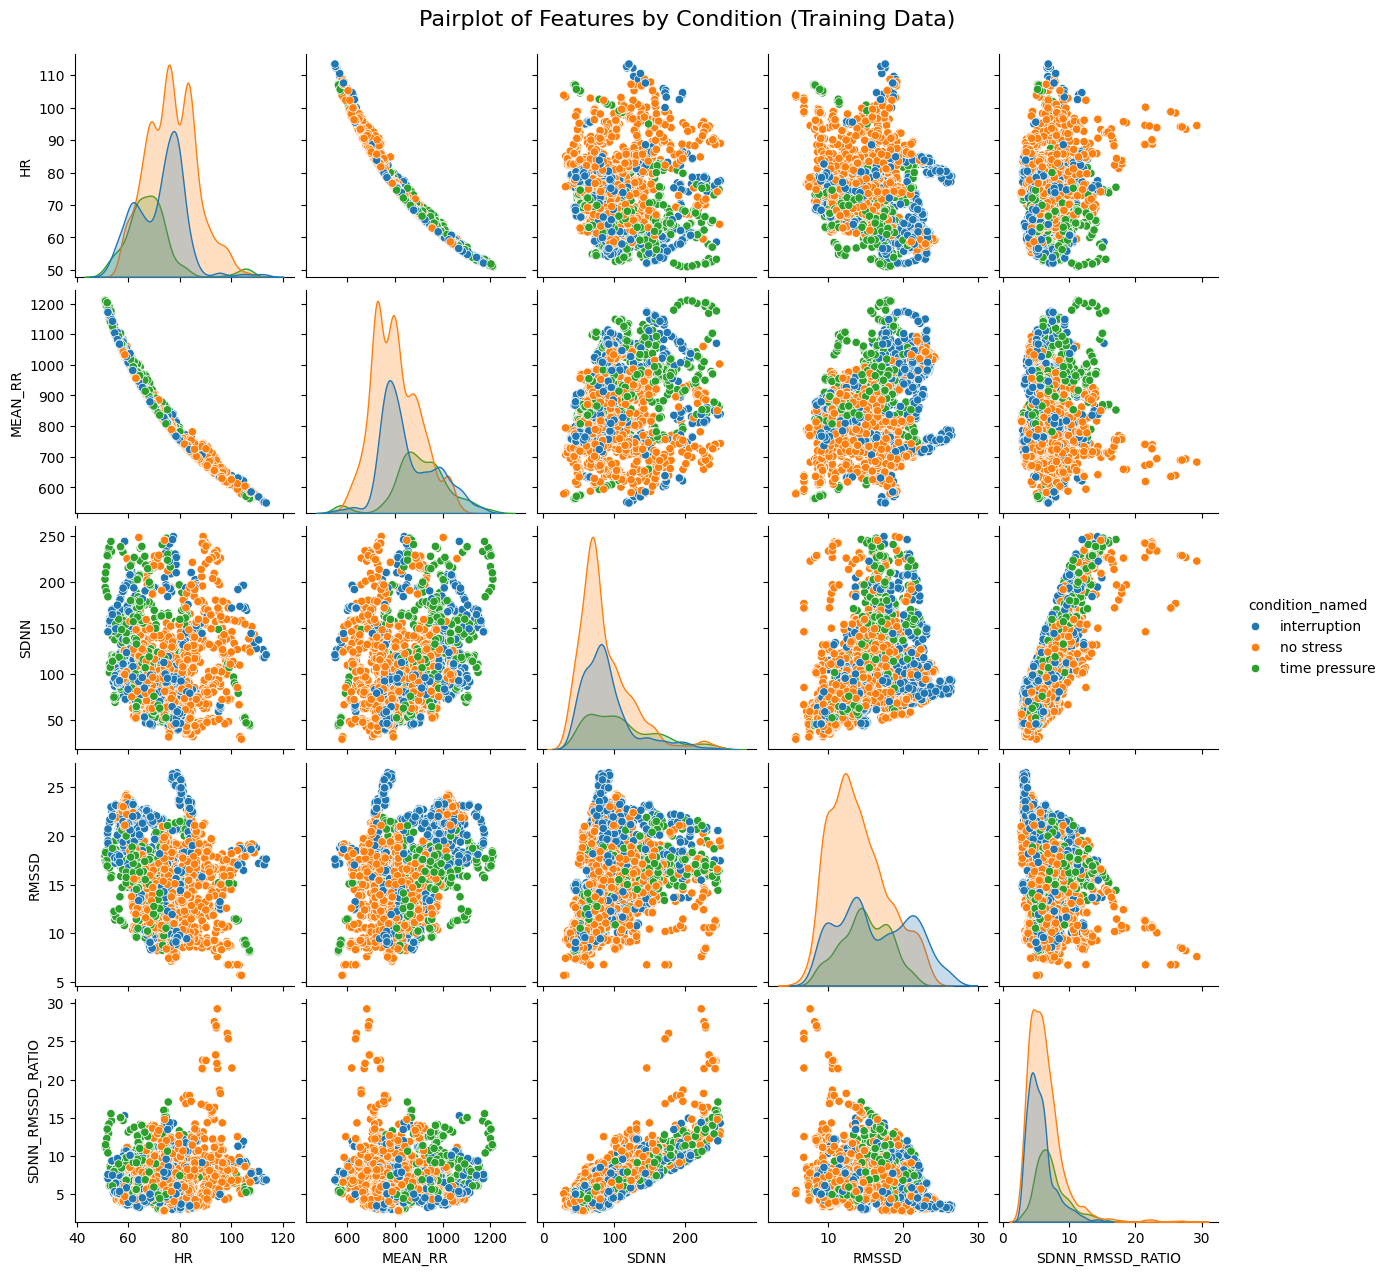

In [109]:
# Check if both filtered dataframes exist
if 'df_train_filtered' in locals() and 'df_test_filtered' in locals():
    
    # Visualization for Training Data
    print("Visualizing feature distributions...")
    
    feature_cols_to_plot = ["HR", "MEAN_RR", "SDNN", "RMSSD", "SDNN_RMSSD_RATIO"]
    # Create a plotting-specific copy of the training data
    df_train_plot = df_train_filtered.copy()
    
    if 'label_encoder' in locals() and 'condition_encoded' in df_train_plot.columns:
        df_train_plot['condition_named'] = label_encoder.inverse_transform(df_train_plot['condition_encoded'])
    
        print("\nGenerating pairplot for TRAINING data...")
        # Sample if the dataframe is too large
        if len(df_train_plot) > 5000:
            print("Pairplot on a sample of 5000 for speed.")
            sample_df_for_pairplot = df_train_plot.sample(n=5000, random_state=42)
        else:
            sample_df_for_pairplot = df_train_plot
        
        # Generate the pairplot
        pairplot_fig = sns.pairplot(sample_df_for_pairplot, 
                                    vars=feature_cols_to_plot, 
                                    hue='condition_named', 
                                    hue_order=label_encoder.classes_, 
                                    diag_kind='kde')
        
        pairplot_fig.fig.suptitle('Pairplot of Features by Condition (Training Data)', y=1.02, fontsize=16)
        plt.show()

    else:
        print("label_encoder or 'condition_encoded' column not found")

else:
    print("df_train_filtered or df_test_filtered not found")